# Visualização de Dados e Informações - Prática #04

### Adinan Alves de Brito Filho
### Priscila Cristina de Souza Mizukami Rocha

In [20]:
import pandas as pd
from matplotlib import pyplot as plt

%config InlineBackend.figure_format='retina'
plt.rc('font', family='Arial')

try:
    import chardet
except ModuleNotFoundError:
    get_ipython().system('pip install chardet')
    import chardet

## Questão 1

In [2]:
csv_file = 'VIS_Pr04_worldcup_matches.csv'

with open(csv_file, 'rb') as f:
    csv_encoding = chardet.detect(f.read())['encoding']

df = pd.read_csv(csv_file, encoding=csv_encoding)
df

,date,team1,team2,spi1,spi2,prob1,prob2,probtie,score1,score2
0,2022-11-20,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,0,2
1,2022-11-21,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,6,2
2,2022-11-21,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0,2
3,2022-11-21,USA,Wales,74.83,65.58,0.4489,0.2591,292.0000,1,1
4,2022-11-22,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,1,2
...,...,...,...,...,...,...,...,...,...,...
59,2022-12-10,England,France,87.59,87.53,516.0000,484.0000,0.0000,1,2
60,2022-12-13,Argentina,Croatia,87.46,79.37,0.6426,0.3574,0.0000,3,0
61,2022-12-14,France,Morocco,87.72,75.13,0.6646,0.3354,0.0000,2,0
62,2022-12-17,Croatia,Morocco,77.65,73.92,0.5325,0.4675,0.0000,2,1


In [3]:
def divide_por_1000(valor):
    if valor >= 100 and valor < 1000:
        return valor / 1000
    else:
        return valor

In [4]:
# Verificando se existem valores >= 100 e valores < 1000, e dividindo tais valores por 1000
colunas_prob = ['prob1', 'prob2', 'probtie']
df[colunas_prob] = df[colunas_prob].apply(lambda x: x.apply(divide_por_1000))


### Item A

In [5]:
# Criando coluna com a probabilidade da Seleção 2 vencer
df['prob2_win'] = 1 - df['prob1'] - df['probtie']

# Agrupando os dados por seleção e calculando as probabilidades máxima, mínima e média de perder um jogo
df_grouped = df.groupby(['team1'])['prob2_win'].agg(['max', 'min', 'mean'])

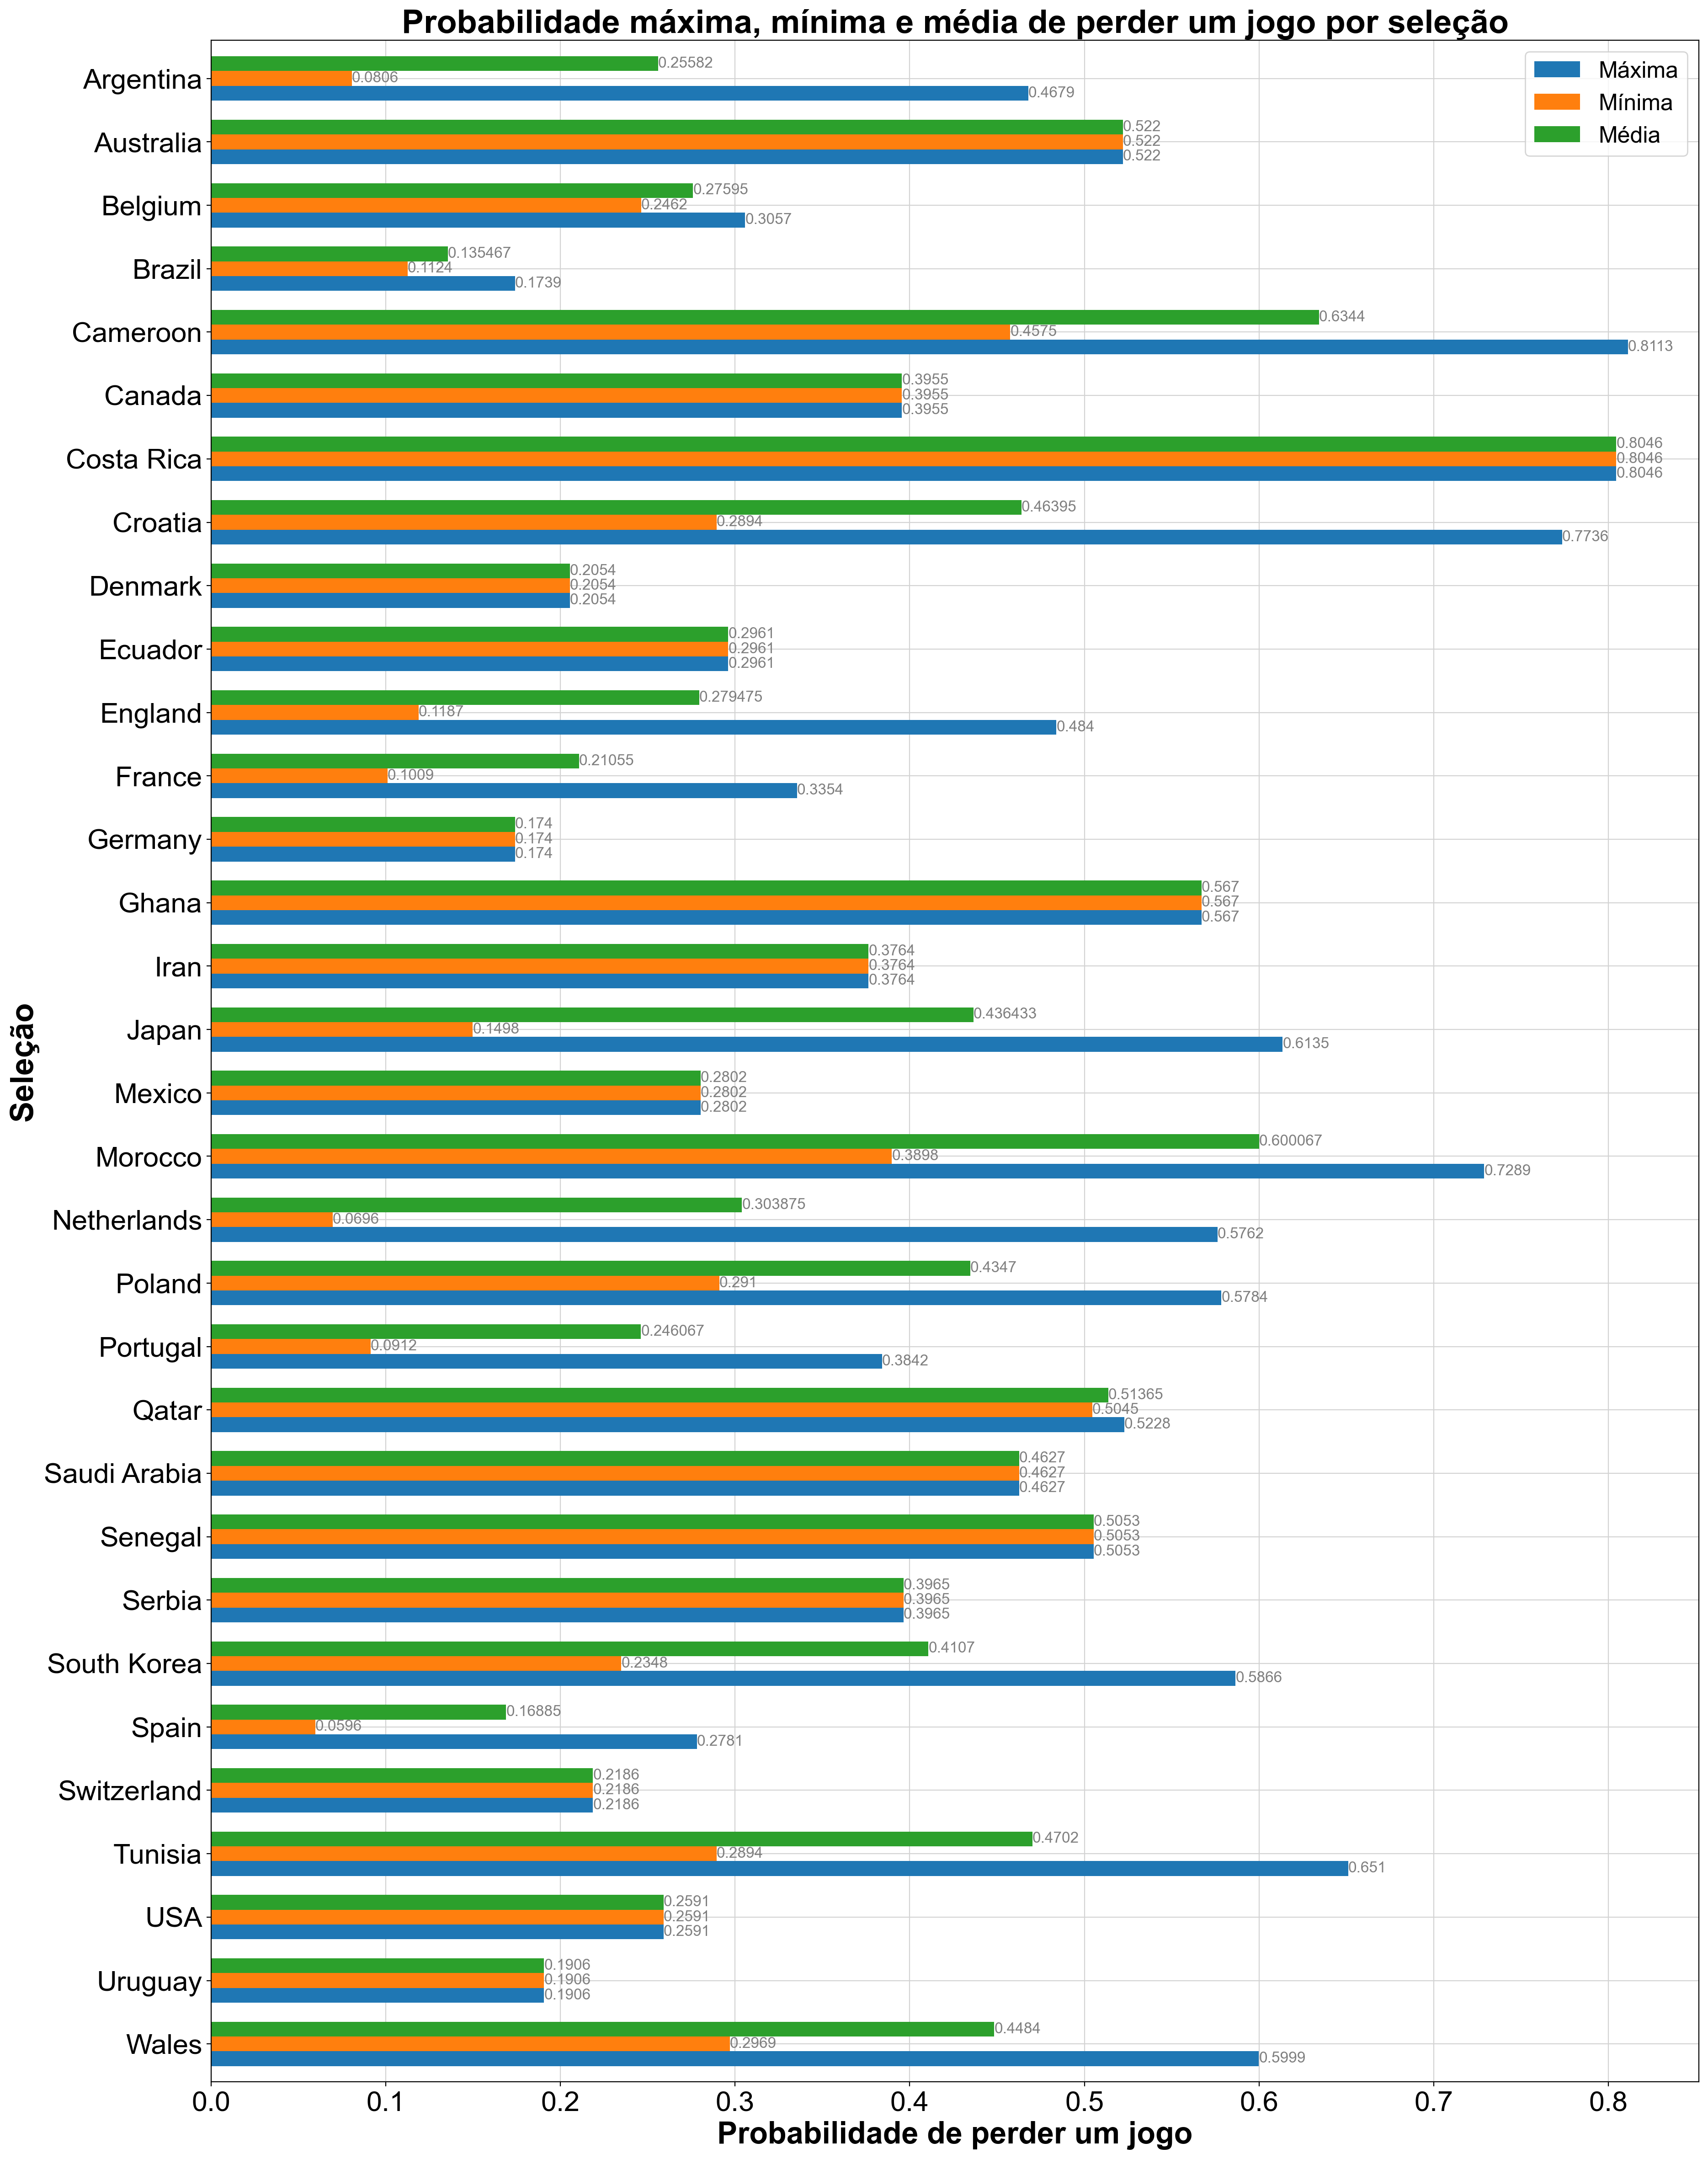

In [148]:
ax = df_grouped.sort_values('team1', ascending=False).plot.barh(zorder=2, width=0.7)

for container in ax.containers:
    ax.bar_label(container, fontsize=12, color='grey')

plt.rcParams["figure.figsize"] = [21, 29]
plt.legend(['Máxima','Mínima','Média'], fontsize=18)
plt.title('Probabilidade máxima, mínima e média de perder um jogo por seleção', fontsize=26, fontweight="bold")
plt.xlabel('Probabilidade de perder um jogo', fontsize=24, fontweight="bold")
plt.ylabel('Seleção', fontsize=25, fontweight="bold")
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.margins(y=0)
ax.grid(zorder=0, color='lightgray')

plt.savefig("Pr_04_Q_01_a.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Item B

In [70]:
# Obtendo todos os jogos em que as 4 primeiras colocadas jogaram
selecoes = ['Argentina', 'France', 'Croatia', 'Morocco']
df_selecoes = df[df['team1'].isin(selecoes) | df['team2'].isin(selecoes)]

In [84]:
# Criando um dataframe com cada seleção tendo uma entrada (um jogo gera duas entradas)
df_spis = pd.concat([df_selecoes[['date', 'team1', 'spi1']].rename(columns={'team1': 'team', 'spi1': 'spi'}),
                     df_selecoes[['date', 'team2', 'spi2']].rename(columns={'team2': 'team', 'spi2': 'spi'})])

# Removendo as entradas de outras seleções que não sejam as quatro primeiras colocadas
df_spis = df_spis[df_spis['team'].isin(selecoes)]

# Transformando a feature 'date' em um objeto datetime e ordenando as entradas por data
df_spis['date'] = pd.to_datetime(df_spis['date'])
df_spis = df_spis.sort_values('date', ascending=True)

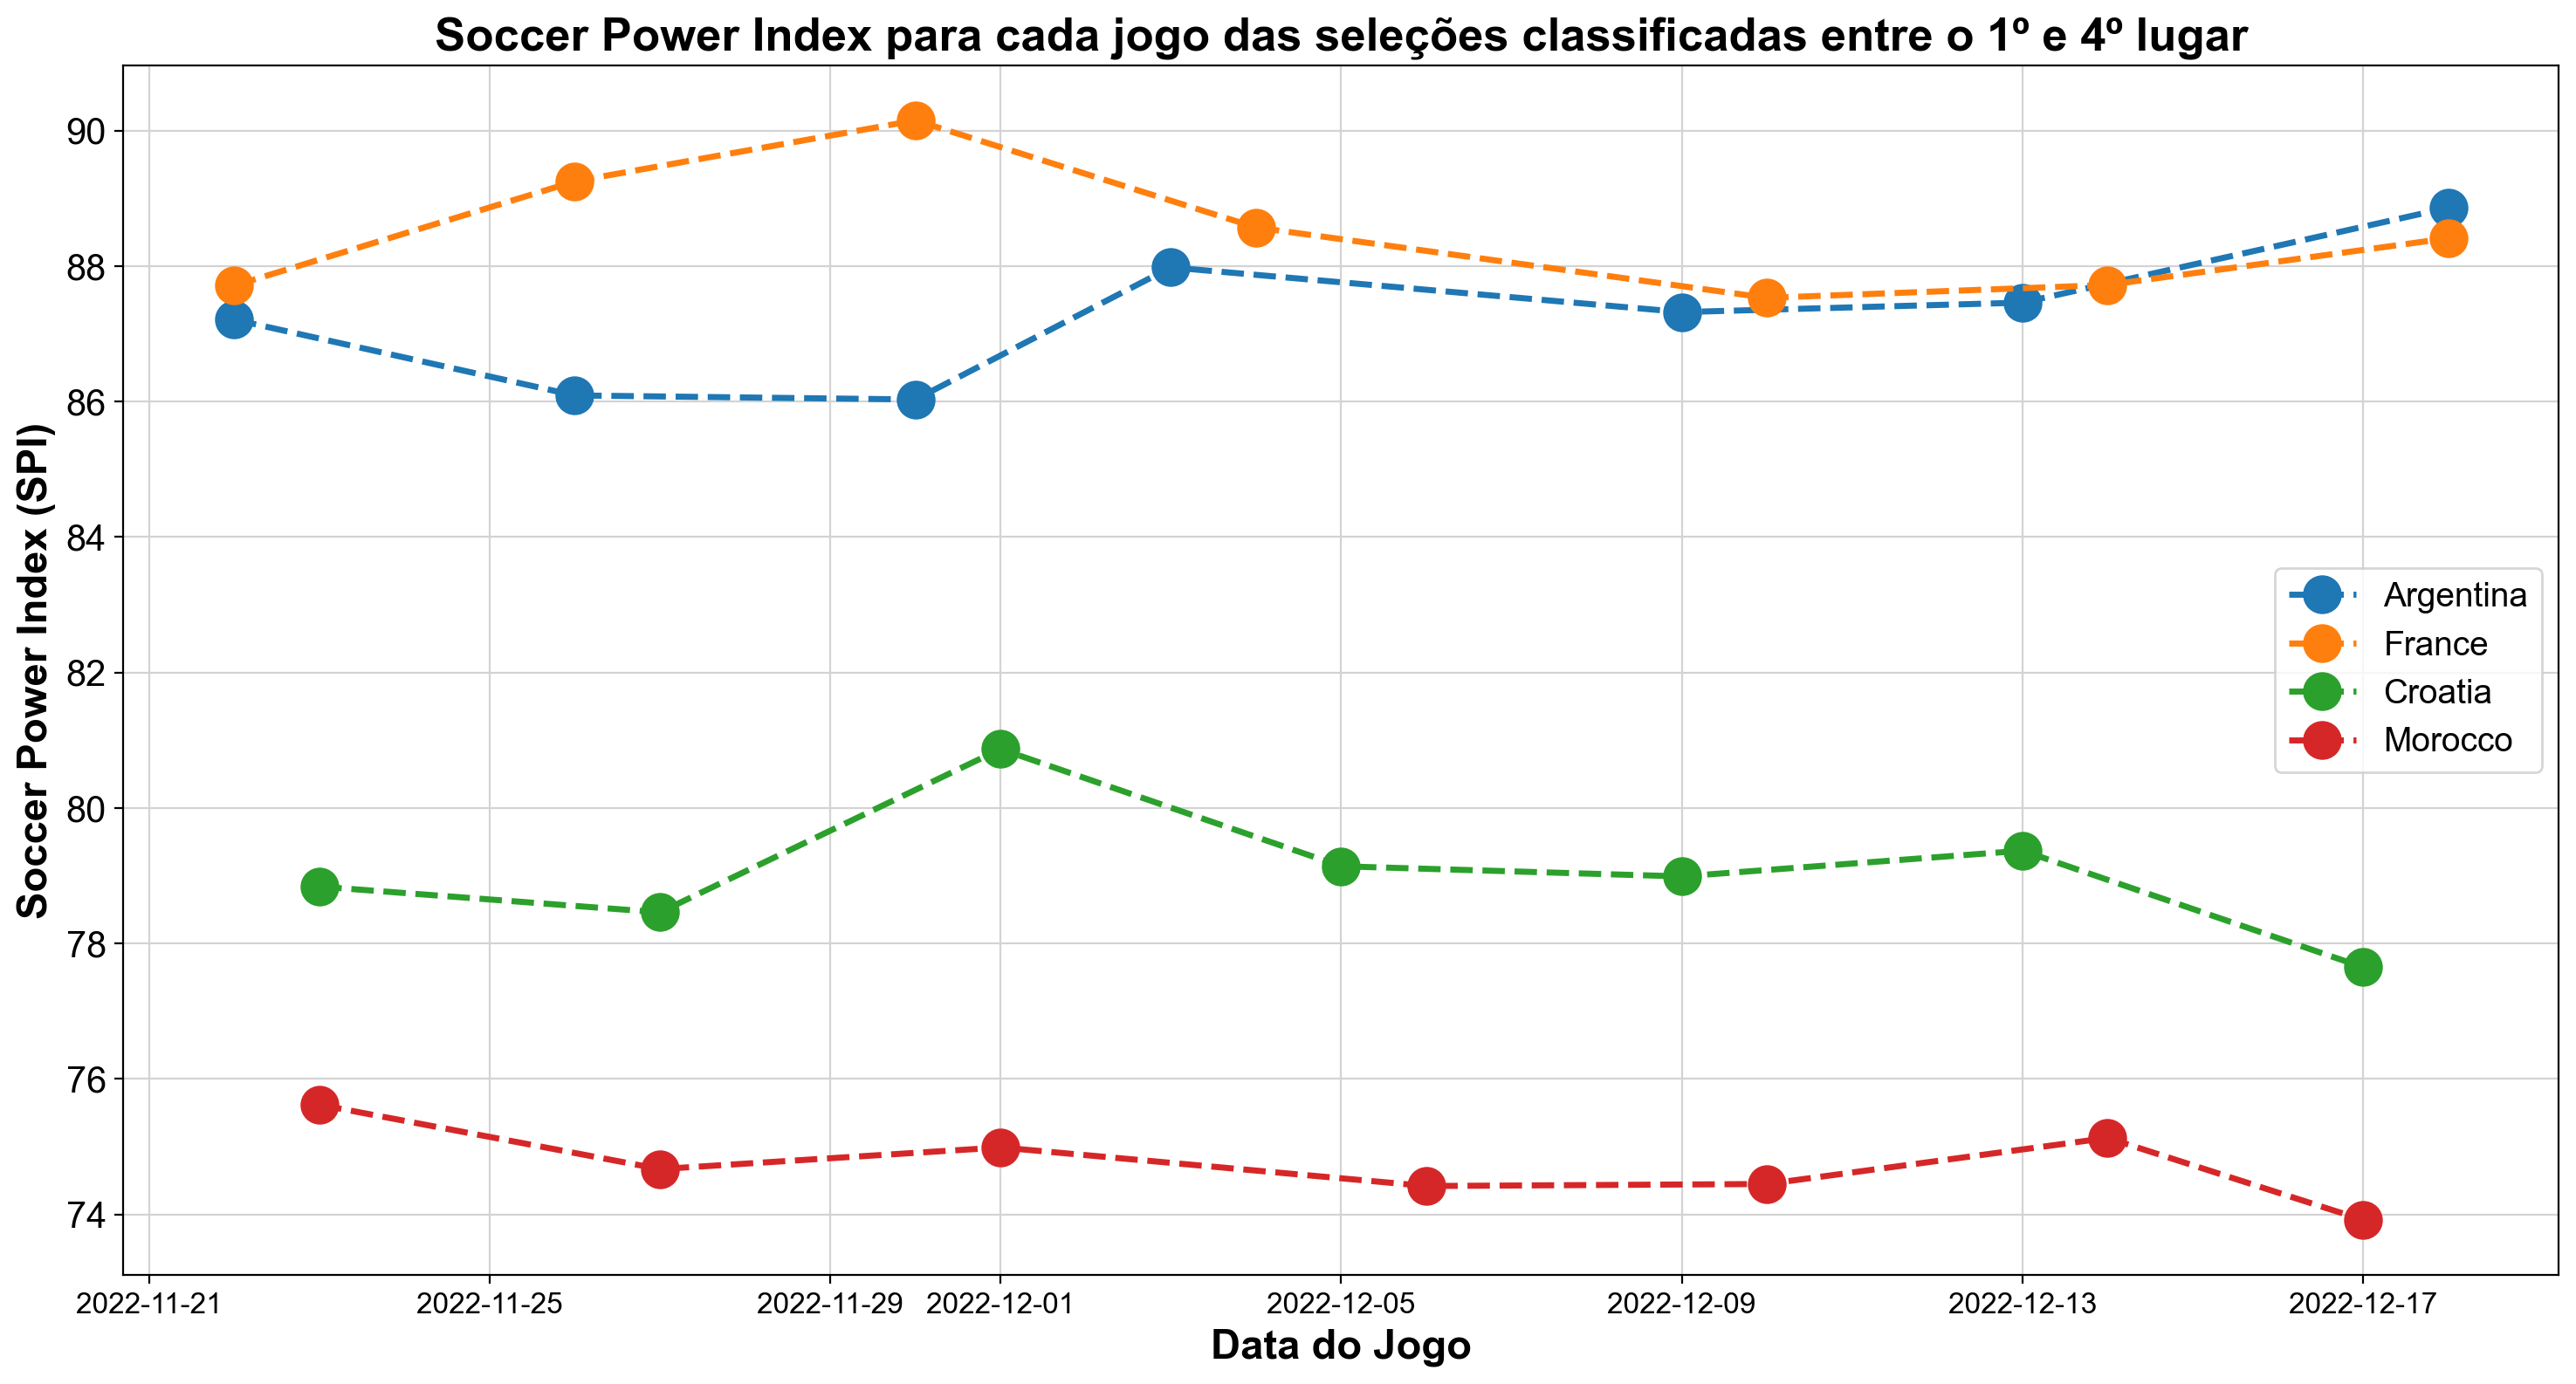

In [120]:
fig, ax = plt.subplots(figsize=(18, 9))

for team in selecoes:
    df_team = df_spis[df_spis['team'] == team]
    #ax.scatter(df_team['date'], df_team['spi'], label=team, s=120, zorder=4)
    ax.plot(df_team['date'], df_team['spi'], label=team, linestyle='--', zorder=3, marker='o', linewidth=2.5, markersize=15)

    # for index, row in df_team.iterrows():
    #     ax.annotate(f"{row['spi']:.2f}", xy=(row['date'], row['spi']), xytext=(5, 3), textcoords='offset points', ha='left', fontsize=8)

ax.legend(fontsize='14')
ax.set_xlabel('Data do Jogo', fontsize=17, fontweight="bold")
ax.set_ylabel('Soccer Power Index (SPI)', fontsize=17, fontweight="bold")
ax.set_title('Soccer Power Index para cada jogo das seleções classificadas entre o 1º e 4º lugar', fontsize=19, fontweight="bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.grid(True, zorder=0, color='lightgray')
plt.savefig("Pr_04_Q_01_b.pdf", format="pdf", bbox_inches="tight")
plt.show()